# Práctica 2
Aprendizaje Máquina
## Segmentación de imagen utilizando K Means 
### Mi propio ejercicio para practicar 

Juan Manuel Alvarado Sandoval 


In [46]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import random

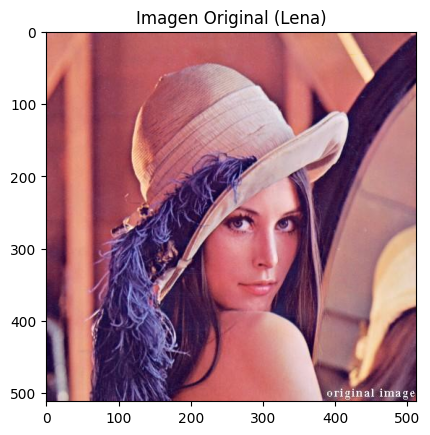

<function matplotlib.pyplot.show(close=None, block=None)>

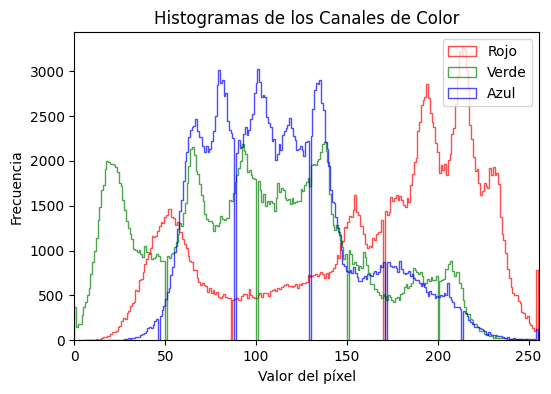

In [47]:
#Recuperamos imagen en modelo BGR
image = cv2.imread('lena_color.jpg')

# convertimos de BGR a RGB 
image_rgb= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Imagen Original (Lena)')
plt.axis('on')
plt.show()


#Visualizamos el histograma 

# Separar la imagen en los tres planos de color
R, G, B = image_rgb[:,:,0], image_rgb[:,:,1], image_rgb[:,:,2]

# Crear la figura para los histogramas combinados
plt.figure(figsize=(6, 4))

# Histograma del canal rojo
plt.hist(R.ravel(), bins=256, color='red', alpha=0.7, label='Rojo', histtype='step')

# Histograma del canal verde
plt.hist(G.ravel(), bins=256, color='green', alpha=0.7, label='Verde', histtype='step')

# Histograma del canal azul
plt.hist(B.ravel(), bins=256, color='blue', alpha=0.7, label='Azul', histtype='step')

# Configuración del gráfico
plt.title('Histogramas de los Canales de Color')
plt.xlabel('Valor del píxel')
plt.ylabel('Frecuencia')
plt.xlim([0, 256])
plt.legend(loc='upper right')

# Mostrar los histogramas
plt.show

In [48]:
#recuperamos dimensiones 
filas, columnas, canales= image_rgb.shape

#convertimos a un arreglo de 2 dimensiones con los 3 planos de color 
image_new= image_rgb.reshape(filas*columnas,canales) 

#verificamos dimensiones 
print("Dimensiones del arreglo: ",image_new.shape)



Dimensiones del arreglo:  (262144, 3)


In [49]:
#Aplicamos KMeans 

#Numero de Clústers 
k=5

#Aplicamos el algoritmo K-Means 
k_means= KMeans(n_clusters=k, random_state=42)
k_means.fit(image_new) #Método fit para entrenar o ajustar el modelo

#Obtener las etiquetas para cada pixel (cluster de pertenencia)
imagen_segmentada= k_means.labels_
imagen_segmentada= imagen_segmentada.reshape(filas,columnas)

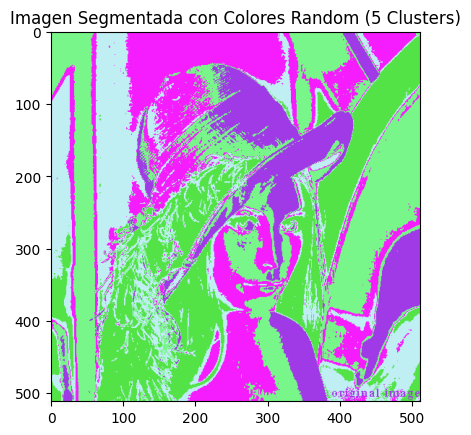

In [51]:
# Generar colores exóticos aleatorios para cada cluster
def generar_colores_exoticos(n_clusters):
    return np.array([[random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)] for _ in range(n_clusters)])

colores_exoticos_cluster = generar_colores_exoticos(k)

# Crear una nueva imagen donde cada píxel se asocie al color de su cluster
imagen_segmentada_coloreada = np.zeros_like(image_rgb)

for i in range(filas):
    for j in range(columnas):
        imagen_segmentada_coloreada[i, j] = colores_exoticos_cluster[imagen_segmentada[i, j]]

# Mostrar la imagen segmentada con colores exóticos
plt.imshow(imagen_segmentada_coloreada)
plt.title(f'Imagen Segmentada con Colores Random ({k} Clusters)')
plt.axis('on')
plt.show()

## Otra imagen segmentada con más centroides

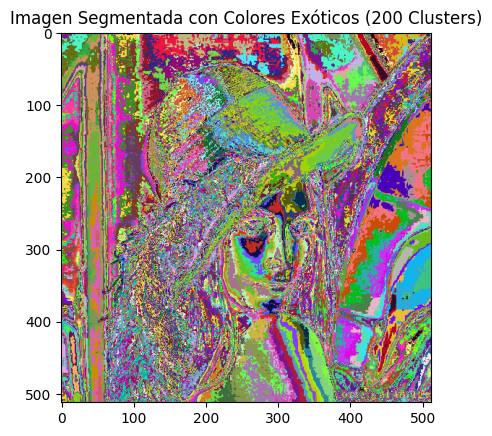

In [57]:
# Aplicamos KMeans

# Número de Clústers 
n_clusters = 200  

# Aplicamos el algoritmo K-Means 
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(image_new)  # image_data representa la imagen preprocesada

# Obtener las etiquetas para cada pixel (cluster de pertenencia)
image_segmented_labels = kmeans_model.labels_
image_segmented = image_segmented_labels.reshape(filas, columnas)

# Generar colores exóticos para cada clúster
exotic_colors = generar_colores_exoticos(n_clusters)  # Función para generar colores llamativos

# Crear una imagen coloreada basada en los clusters
image_colored_segmented = np.zeros_like(image_rgb)

# Asignar colores a cada píxel según el clúster
for i in range(filas):
    for j in range(columnas):
        image_colored_segmented[i, j] = exotic_colors[image_segmented[i, j]]

# Mostrar la imagen segmentada con colores llamativos
plt.imshow(image_colored_segmented)
plt.title(f'Imagen Segmentada con Colores Exóticos ({n_clusters} Clusters)')
plt.axis('on')
plt.show()
